# AM - Previsão de Doênça Cardíaca

Este projeto tem como objetivo didático prever a probabilidade do paciente ter uma doênça cardíaca.

**Repositório Público**: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# Etapas fundamentais para construção do algoritmo

1. Análise do problema
2. Exploração, tratamento e análise dos dados
3. Pré-processamento dos dados
4. Escolha do tipo de algoritmo (supervisionado, não-supervisionado)
5. Escrever o código
6. Treinar, testar e escolher o melhor para o problema



## Aprendizagem Supervisionada: Classificação

Pré-processamento

In [ ]:
# # Baixar o dataset
!curl -L -o heart.csv https://gist.githubusercontent.com/fabricioifc/227d10871d4b5b62ddbadfa1911fcd3e/raw/9cbee1c587d4ef4c193d36039c7b3ce2566eb2ff/heart.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35920  100 35920    0     0  97411      0 --:--:-- --:--:-- --:--:-- 97608


### Dicionário de Dados
# Dicionário de Dados

## Atributos

- **Age**:
  - **Descrição**: Idade do paciente.
  - **Tipo**: Numérico
  - **Unidade**: Anos
  - **Exemplo**: 40, 49, 37, 48, 54, 39

- **Sex**:
  - **Descrição**: Sexo do paciente.
  - **Tipo**: Categórico
  - **Valores**:
    - 'M' (Masculino)
    - 'F' (Feminino)
  - **Exemplo**: 'M', 'F', 'M', 'F', 'M', 'M'

- **ChestPainType**:
  - **Descrição**: Tipo de dor no peito do paciente.
  - **Tipo**: Categórico
  - **Valores**:
    - 'ATA' (Angina Típica)
    - 'NAP' (Angina Atípica)
    - 'ASY' (Assintomática)
    - 'TA' (Dor Não Cardíaca)
  - **Exemplo**: 'ATA', 'NAP', 'ATA', 'ASY', 'NAP', 'NAP'

- **RestingBP**:
  - **Descrição**: Pressão arterial em repouso (em mmHg).
  - **Tipo**: Numérico
  - **Unidade**: mmHg
  - **Exemplo**: 140, 160, 130, 138, 150, 120

- **Cholesterol**:
  - **Descrição**: Colesterol sérico (em mg/dl).
  - **Tipo**: Numérico
  - **Unidade**: mg/dl
  - **Exemplo**: 289, 180, 283, 214, 195, 339

- **FastingBS**:
  - **Descrição**: Açúcar no sangue em jejum. 1 = maior que 120 mg/dl, 0 = menor ou igual a 120 mg/dl.
  - **Tipo**: Binário
  - **Valores**:
    - 0 (Menor ou igual a 120 mg/dl)
    - 1 (Maior que 120 mg/dl)
  - **Exemplo**: 0, 0, 0, 0, 0, 0

- **RestingECG**:
  - **Descrição**: Resultados do exame eletrocardiográfico em repouso.
  - **Tipo**: Categórico
  - **Valores**:
    - 'Normal'
    - 'ST' (Anormalidade no Segmento ST)
    - 'LVH' (Hipertrofia Ventricular Esquerda)
  - **Exemplo**: 'Normal', 'Normal', 'ST', 'Normal', 'Normal', 'Normal'

- **MaxHR**:
  - **Descrição**: Taxa máxima de batimento cardíaco atingida.
  - **Tipo**: Numérico
  - **Unidade**: bpm (Batimentos por minuto)
  - **Exemplo**: 172, 156, 98, 108, 122, 170

- **ExerciseAngina**:
  - **Descrição**: Indicação de angina induzida por exercício.
  - **Tipo**: Binário
  - **Valores**:
    - 'Y' (Sim)
    - 'N' (Não)
  - **Exemplo**: 'N', 'N', 'N', 'Y', 'N', 'N'

- **Oldpeak**:
  - **Descrição**: Depressão do segmento ST induzida pelo exercício em relação ao repouso.
  - **Tipo**: Numérico
  - **Unidade**: Depressão ST (Valor contínuo)
  - **Exemplo**: 0, 1, 0, 1.5, 0, 0

- **ST_Slope**:
  - **Descrição**: Inclinação do segmento ST máximo durante o exercício.
  - **Tipo**: Categórico
  - **Valores**:
    - 'Up' (Ascendente)
    - 'Flat' (Plano)
    - 'Down' (Descendente)
  - **Exemplo**: 'Up', 'Flat', 'Up', 'Flat', 'Up', 'Up'

- **HeartDisease**:
  - **Descrição**: Presença de doença cardíaca.
  - **Tipo**: Binário
  - **Valores**:
    - 0 (Não tem)
    - 1 (Tem)
  - **Exemplo**: 0, 1, 0, 1, 0, 0

### Explorar os Dados

Vamos carregar o dataset e compreender os dados.

In [ ]:
import pandas as pd
dados = pd.read_csv('heart.csv')

In [ ]:
dados
# dados.head(5)
# dados.tail()
# dados.shape
# dados.info()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Exploração dos Atributos

Esse processo ajuda a visualizar a distribuição do atributo dentro do dataset. O gráfico de barras permite identificar padrões como:

 - A faixa etária mais comum.
 - A presença de outliers (valores extremos).
 - Se há idades faltantes ou agrupadas em intervalos específicos.

<Axes: xlabel='Age'>

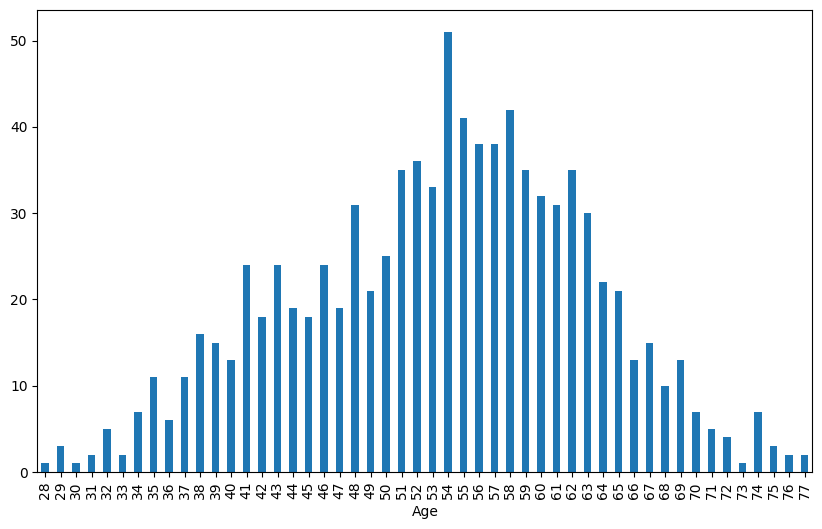

In [ ]:
# Verificar a distribuição da idade e observar como ela varia dentro do dataset.
# dados.Age.value_counts().sort_index()
dados['Age'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

### Fasting BS (blood sugar) - açucar no sangue em jejum

O atributo Fasting BS (Fasting Blood Sugar) representa o nível de glicose no sangue em jejum e é um indicador importante para diagnosticar diabetes. No dataset, esse atributo é categorizado da seguinte forma:

* 0: FastingBS < 120 mg/dl → Nível normal de glicose, indicando que a pessoa não é diabética.
* 1: FastingBS ≥ 120 mg/dl → Nível elevado de glicose, sugerindo que a pessoa pode ser diabética.

---

A maioria dos indivíduos no conjunto de dados não apresenta nível elevado de glicose em jejum.

<Axes: ylabel='count'>

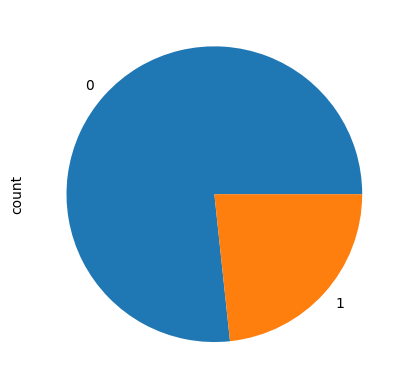

In [ ]:
dados.FastingBS.value_counts().plot(kind='pie')

### Correlação entre Açucar no Sangue e Doênça Cardíaca

Como interpretar os resultados?

---


* Se a barra FastingBS = 1 (glicemia alta) for significativamente mais alta para HeartDisease = 1, isso pode indicar que há uma relação entre glicemia alta e doença cardíaca.
* Se a distribuição for parecida entre os grupos (HeartDisease = 0 e 1), então a glicemia de jejum pode não ser um fator tão relevante no conjunto de dados.



---

 Ao analisar o gráfico, observa-se que os indivíduos com glicemia em jejum normal (FastingBS = 0) apresentam uma menor incidência de doença cardíaca no conjunto de dados. Além disso, os dados indicam que, entre as pessoas com FastingBS = 1 (glicemia em jejum ≥ 120 mg/dl), a maioria apresenta diagnóstico de doença cardíaca (HeartDisease = 1). Isso sugere uma correlação positiva entre glicemia elevada e o risco aumentado de doença cardíaca.

<Axes: xlabel='FastingBS', ylabel='count'>

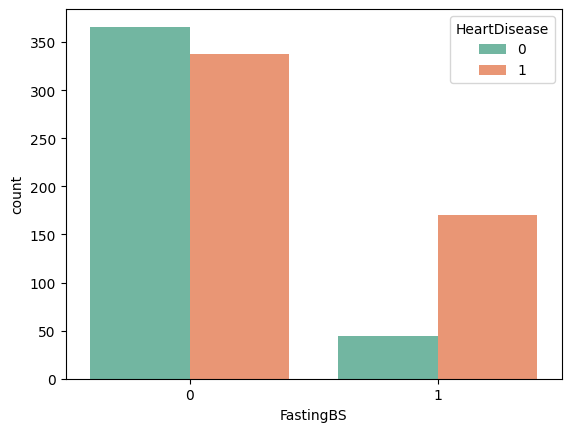

In [ ]:
import seaborn as sns
sns.countplot(
    x='FastingBS',
    data=dados,
    hue='HeartDisease',
    palette='Set2',
    stat='count'
  )

### RestingBP (heart rate) - frequência cardíaca em repouso

* Adultos saudáveis: **60 a 100 bpm**
* Atletas ou indivíduos bem condicionados fisicamente: **40 a 60 bpm**
* Frequência cardíaca acima de 100 bpm: Taquicardia (**acima de 100 bpm **pode indicar problemas, como desidratação ou distúrbios cardíacos)
* Frequência cardíaca **abaixo de 60 bpm**: Bradicardia (em atletas é comum, mas pode indicar problemas cardíacos em outros casos)

Se houver muitos valores muito altos ou muito baixos, isso pode indicar a presença de outliers (valores extremos).

In [ ]:
dados.RestingBP.value_counts().sort_index()

,count
RestingBP,
0,1
80,1
92,1
94,2
95,6
...,...
180,12
185,1
190,2


### Gráfico de BoxPlot para identificar Outliers

Interpretação do Boxplot:
* Pontos fora das linhas: São considerados outliers e indicam valores extremos.
* Pontos dentro da caixa e bigodes: São valores considerados normais ou dentro da faixa esperada.


---
### **O que o boxplot pode revelar:**
* Mediana (linha no meio da caixa): A mediana é o valor central da distribuição de dados. Ela nos dá uma ideia de onde está o "centro" dos dados de RestingBP.

* Quartis (limites da caixa): A caixa do boxplot representa o intervalo entre o 1º quartil (Q1) e o 3º quartil (Q3), ou seja, 50% dos dados. Se o boxplot for largo, significa que os dados são mais dispersos.

* Bigodes (linhas que saem da caixa): Os bigodes indicam a extensão dos dados até o máximo e o mínimo, com exceção dos outliers. Eles mostram onde os dados estão distribuídos fora dos quartis.

* Outliers (pontos fora dos bigodes): Pontos que estão fora dos bigodes indicam outliers — ou seja, valores extremos que podem ser muito baixos ou muito altos em comparação com a maioria dos dados.

#### **O que observar no gráfico:**
* Se a caixa for pequena, isso indica que a maioria dos valores de RestingBP estão concentrados em torno da mediana, com pouca variação.
* Se houver outliers, isso pode indicar que existem alguns indivíduos com pressão arterial de repouso muito alta ou muito baixa em comparação com a maioria da população do dataset.

<Axes: xlabel='RestingBP'>

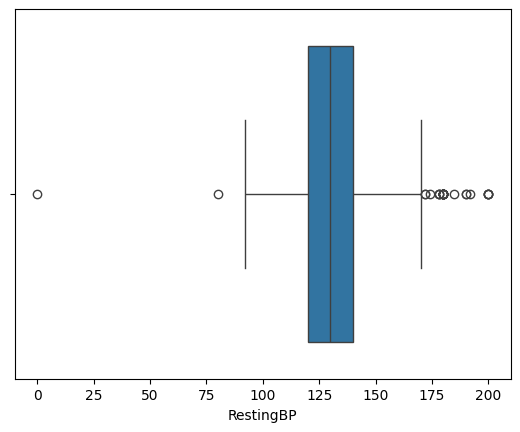

In [ ]:
import seaborn as sns
sns.boxplot(x=dados['RestingBP'])

### MaxHR (heart rate) - frequência cardíaca máxima

* Poucas pessoas com valores baixos ou extremos

<Axes: xlabel='MaxHR'>

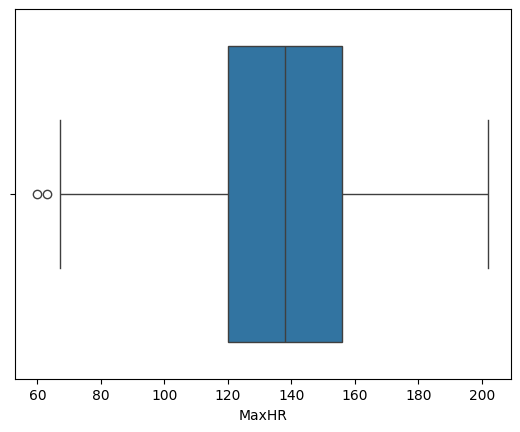

In [ ]:
dados.MaxHR.value_counts().sort_index()
import seaborn as sn
sn.boxplot(x=dados['MaxHR'])

### Histograma de Idade dos Pacientes

* O histograma exibe a distribuição da idade dos pacientes, ou seja, quantas pessoas pertencem a cada faixa etária.
* Se há um pico no meio, a maioria dos pacientes está em uma faixa etária intermediária.

<Axes: >

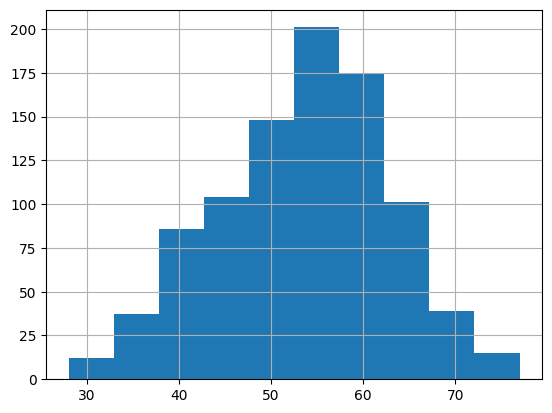

In [ ]:
dados.Age.hist()

### MaxHR (heart rate) - frequência cardíaca máxima (histograma)

Valores típicos:

* Idade jovem (20 anos): Cerca de 200 bpm.
* Idade adulta (40 anos): Cerca de 180 bpm.
* Idade média (60 anos): Cerca de 160 bpm.
* Idade avançada (80 anos): Cerca de 140 bpm.

Analisando o resultado, percebe-se que a distribuição está boa.

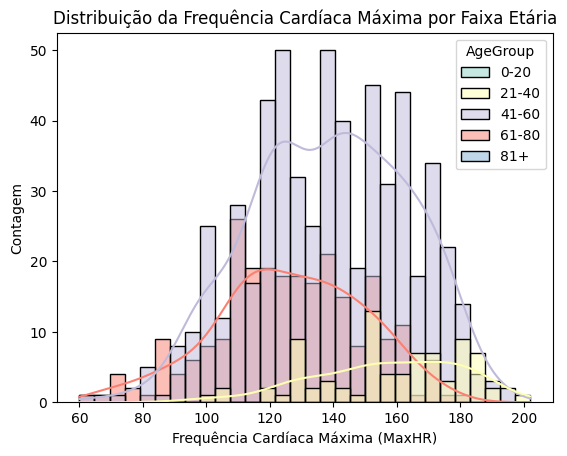

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
dados_simulados = dados.copy()

# Definir as faixas etárias
faixas_etarias = [0, 20, 40, 60, 80, 100]
rotulos = ['0-20', '21-40', '41-60', '61-80', '81+']

# Criar uma nova coluna 'AgeGroup' que categoriza a idade nas faixas
dados_simulados['AgeGroup'] = pd.cut(
    dados_simulados['Age'], bins=faixas_etarias, labels=rotulos, right=False)

# Criar o histograma agrupado por faixa etária
sns.histplot(dados_simulados, x='MaxHR', bins=30,
             stat='count', kde=True, hue='AgeGroup', palette='Set3')
# Adicionar título e labels
plt.title('Distribuição da Frequência Cardíaca Máxima por Faixa Etária')
plt.xlabel('Frequência Cardíaca Máxima (MaxHR)')
plt.ylabel('Contagem')
plt.show()


### Exercise Angina (Angina Induzida por Exercício)

A Angina Induzida por Exercício (ou Exercise Angina) é um tipo de dor no peito (angina) que ocorre durante ou após a realização de atividades físicas ou exercícios intensos.

* Variável Categórica (sim ou não)

In [ ]:
dados.ExerciseAngina.value_counts().sort_index()

,count
ExerciseAngina,
N,547
Y,371


In [ ]:
# Apenas mais uma forma de visualização para dados categóricos
import plotly.express as px
px.pie(dados, 'ExerciseAngina')

### OldPeak - Depressão de ST (referência no eletro cardiograma - ECG) induzida por exercício em relação ao repouso

Refere-se à depressão do segmento ST induzida pelo exercício, comparada à linha de base no repouso. A depressão é medida em milímetros (mm). Por exemplo, se o valor de Oldpeak for 1.5, isso significa que a depressão do segmento ST foi de 1.5 mm durante o exercício, em comparação ao repouso.

Como interpretar:
* Valores baixos ou zero (Oldpeak = 0): Geralmente indicam que o paciente não apresenta sinais de isquemia significativa durante o exercício.
* Valores positivos (Oldpeak > 0): Indicativos de depressão do segmento ST, podendo sugerir isquemia cardíaca ou doença arterial coronariana.
* Valores elevados: Se a depressão for muito acentuada, pode indicar um risco mais alto de problemas cardíacos.

In [ ]:
dados.Oldpeak.value_counts()

,count
Oldpeak,
0.0,368
1.0,86
2.0,76
1.5,53
3.0,28
1.2,26
0.2,22
0.5,19
1.4,18


<Axes: xlabel='Oldpeak', ylabel='Count'>

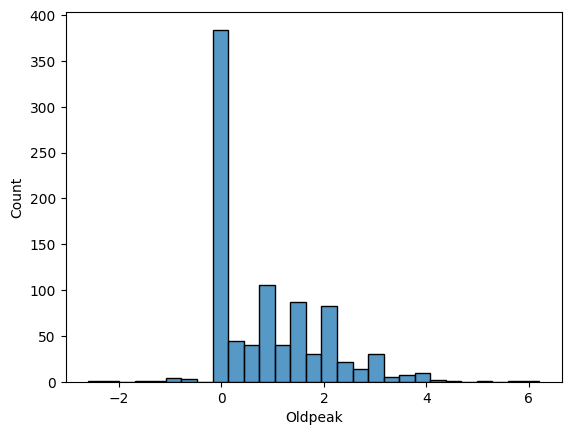

In [ ]:
import seaborn as sns
sns.histplot(dados, x='Oldpeak')

### ST_Slope - Inclinação do segmento ST no ECG

A inclinação do segmento ST (ST_Slope) descreve a forma ou a inclinação do segmento ST durante um teste de esforço (ou teste de exercício) em comparação ao repouso.

* Up (para cima)
* Flat (plano): é o ideal
* Down (para baixo)

Analisando os dados categóricos (Down, Flat, Up), temos várias pessoas com status UP

In [ ]:
dados.ST_Slope.value_counts().sort_index()
# import plotly.express as px
# px.pie(dados, 'ST_Slope')

,count
ST_Slope,
Down,63
Flat,460
Up,395


### Quantidade de Amostras para Doênça Cardíaca

Verificar a distribuição de HeartDisease, que pode ser uma variável de classificação

Podemos treinar o algoritmo e usar esse atributo como "supervisor"

In [ ]:
dados['HeartDisease'].value_counts()
# dados.Cholesterol.value_counts().sort_index() # Tem um valor 0 para colesterol

,count
HeartDisease,
1,508
0,410


In [ ]:
import plotly.express as px
px.pie(dados, 'HeartDisease')

### Tipo do Atributo



In [ ]:
# # Baixar o dataset
!curl -L -o heart.csv https://gist.githubusercontent.com/fabricioifc/227d10871d4b5b62ddbadfa1911fcd3e/raw/9cbee1c587d4ef4c193d36039c7b3ce2566eb2ff/heart.csv

import pandas as pd
dados = pd.read_csv('heart.csv')

# int, object(string), float, complex, ...
dados.dtypes

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35920  100 35920    0     0    99k      0 --:--:-- --:--:-- --:--:--   99k


,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


### Tratamento de Dados - Valores Missing (NaN)

In [ ]:
# Identificar valores missing
dados.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


### Tratamento de Dados - Simulação

Vamos gerar alguns valores incorretos em nosso dataset para simular o tratamento de dados.

* sample(frac=0.05).index: Seleciona aleatoriamente 5% dos registros.
* loc[...] = np.nan: Substitui esses registros por valores ausentes (NaN).
* isnull().sum(): Conta quantos valores NaN foram inseridos.

In [ ]:
import numpy as np

def simular_dados():
  dados_simulados = dados.copy()
  cols = ['Cholesterol', 'RestingBP', 'MaxHR', 'ChestPainType']
  for col in cols:
      dados_simulados.loc[dados_simulados.sample(frac=0.05).index, col] = np.nan
  return dados_simulados

dados_simulados = simular_dados()
dados_simulados

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,NaN,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


In [ ]:
dados_simulados.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,46
RestingBP,46
Cholesterol,46
FastingBS,0
RestingECG,0
MaxHR,46
ExerciseAngina,0
Oldpeak,0


### Tratamento de Dados - Valores Ausentes

Se os valores ausentes forem poucos e aleatórios, podemos simplesmente remover as linhas ou colunas afetadas.

* Útil quando há poucos valores ausentes.
* Pode reduzir demais o conjunto de dados se houver muitas ocorrências.

In [ ]:
dados_simulados = simular_dados()
print(dados_simulados.shape)

dados_simulados.dropna(inplace=True)
print(dados_simulados.shape)

(918, 12)
(747, 12)


### Tratamento de Dados - Valores Ausentes

Quando a remoção não é ideal, podemos preencher os valores ausentes (imputação de dados).

* Simples e rápido, mas pode introduzir viés.

In [ ]:
dados_simulados = simular_dados()

# Se ChestPainType estiver NaN, ele será substituído por "Desconhecido".
dados_simulados.fillna({"ChestPainType": "Desconhecido"}, inplace=True)  # Para categóricos

# Todos os outros valores NaN serão substituídos por 0.
dados_simulados.fillna(0, inplace=True)  # Para atributos numéricos

dados_simulados

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,0.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,Desconhecido,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,0.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


In [ ]:
# dados_simulados.isnull().sum()
# dados_simulados.shape
dados_simulados

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,0.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,Desconhecido,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,0.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


### Tratamento de Dados - Valores Ausentes

Preencher com a média, mediana ou moda

* **Média**: Boa para distribuição normal, mas sensível a outliers.
* **Mediana**: Melhor para dados com outliers.
* **Moda**: Retorna o valor mais frequente (moda) da coluna. Boa para variáveis categóricas.

In [ ]:
dados_simulados = simular_dados()
media = dados_simulados['Cholesterol'].mean()
median = dados_simulados['Cholesterol'].median()
moda = dados_simulados['ChestPainType'].mode()[0]

print(f"Média: {media}")
print(f"Mediana: {median}")
print(f"Moda: {moda}")

dados_simulados.fillna({"Cholesterol" : media}, inplace=True)  # Média
dados_simulados.fillna({"Cholesterol": median}, inplace=True)  # Mediana
dados_simulados.fillna({"ChestPainType": moda}, inplace=True)  # Moda
dados_simulados

Média: 197.00573394495413
Mediana: 221.5
Moda: ASY


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,NaN,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


## Analisando os Atributos

Para análises numéricas e machine learning, precisamos transformar **variáveis categóricas** e **nominais** em valores numéricos. Isso pode ser feito de diferentes formas, dependendo do tipo da variável.  

Exemplo:

| Tipo | Exemplo | Estratégia de Transformação |
|------|---------|----------------------------|
| **Ordinal** | ST_Slope: `Up`, `Flat`, `Down` | Mapear valores (`Up → 2`, `Flat → 1`, `Down → 0`) |
| **Nominal** | ChestPainType: `ATA`, `NAP`, `ASY`, `TA` | One-Hot Encoding (`ChestPainType_ATA`, etc.) |
| **Binária** | ExerciseAngina: `Y`, `N` | Mapear para `0` e `1` |

In [ ]:
dados_simulados = dados.copy()
dados_simulados.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Transformando as variáveis categóricas nominais em variáveis categóricas ordinais

In [ ]:
import pandas as pd

dados_simulados = dados.copy()
dados_simulados['Sex'] = dados_simulados['Sex'].map({'M': 1, 'F': 0})
dados_simulados['RestingECG'] = dados_simulados['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
dados_simulados['ExerciseAngina'] = dados_simulados['ExerciseAngina'].map({'Y': 1, 'N': 0})
dados_simulados['ST_Slope'] = dados_simulados['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})
dados_simulados['ChestPainType'] = dados_simulados['ChestPainType'].map({'ATA': 1, 'NAP': 2, 'TA': 3, 'ASY': 4})

# Aplicando One-Hot Encoding na coluna 'ChestPainType'. Evita que o modelo aprenda relações inexistentes entre categorias. Mas, aumenta a dimensionalidade dos dados (pode ser um problema com muitas categorias).
# dados_simulados = pd.get_dummies(dados_simulados, columns=['ChestPainType'], drop_first=False)

# Concatenando para mostrar a diferença após aplicar
amostras = pd.concat([dados.head(3), dados_simulados.head(3)])
amostras

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0


In [ ]:
dados_simulados

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,4,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,0,132,0,1.2,1,1
914,68,1,4,144,193,1,0,141,0,3.4,1,1
915,57,1,4,130,131,0,0,115,1,1.2,1,1
916,57,0,1,130,236,0,2,174,0,0.0,1,1


### Matriz de Correlação

A matriz de correlação é uma tabela que exibe a correlação entre múltiplas variáveis numéricas em um conjunto de dados. A correlação mede o grau de associação entre duas variáveis e indica se elas tendem a aumentar ou diminuir juntas.

* Valores próximos de 1 indicam uma forte correlação positiva (quando uma variável aumenta, a outra também tende a aumentar).
* Valores próximos de -1 indicam uma forte correlação negativa (quando uma variável aumenta, a outra tende a diminuir).
* Valores próximos de 0 indicam que não há correlação linear entre as variáveis.

---
*Não confundir com Matriz de Confusão, que avalia desempenho de modelos de classificação.*

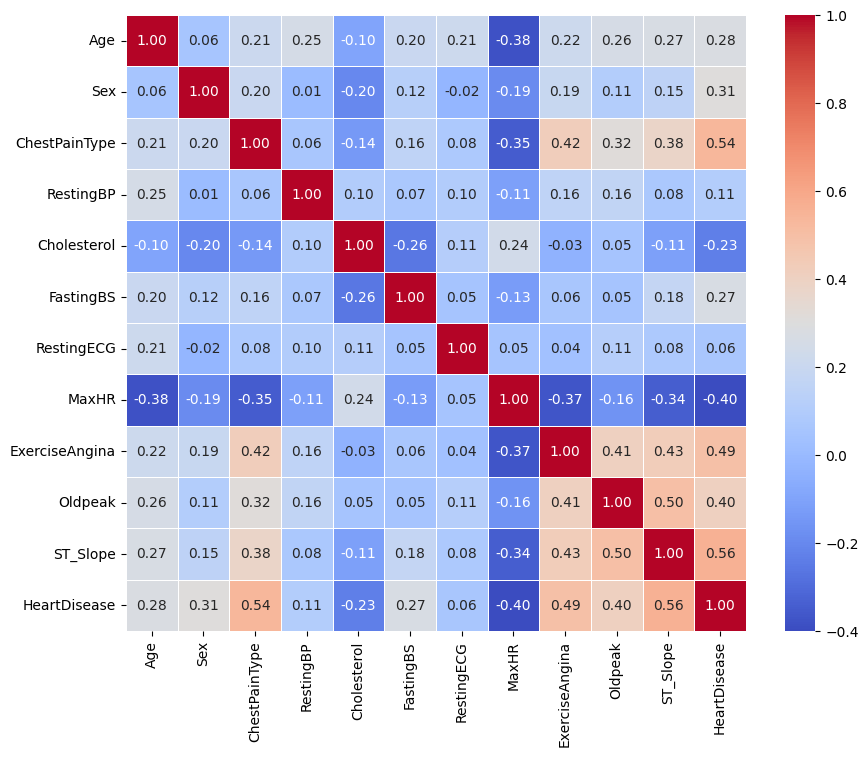

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(dados_simulados.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

## Tratamento de Valores Incoerentes

#### Substituindo registros com valor zero para pressão arterial (RestingBP)

In [ ]:
# Perceba que temos alguns registros com valor zero (min=0)
dados_temp = dados_simulados.copy()
dados_simulados.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,2.942266,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,1.230271,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


## Analise dos Dados Descritos

Perceba na descrição que aparecem apenas os atributos numéricos. Não da para fazer cálculos em valores categóricos.

* A média de idade é 53 e a mediana é 54. Isso indica uma tendência de que a distribuição de idade é normal.
* O valor mínimo do colesteról é zero. Isso pode ser um problema.
* RestingBP tem 1 registro com valor zero. Como é apenas 1, podemos remover

In [ ]:
# Como temos apenas 1 registro com RestingBP=0, vale a pena remover esta linha

# Apenas com valor zero. Temos 1 registro
dados_simulados.loc[dados_simulados['RestingBP'] == 0]

# Filtra os dados, removendo registros onde a pressão arterial em repouso (RestingBP) é zero.
dados_temp = dados_simulados.loc[dados_simulados['RestingBP'] != 0] # iloc: seleciona apenas as linhas com a condição verdadeira
dados_temp.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.789531,2.943293,132.540894,199.016358,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795,0.552890
std,9.437636,0.407864,1.230548,17.999749,109.246330,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,174.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


### 🔎 **Problemas Identificados nos Dados**  

Analisando as estatísticas descritivas da tabela, podemos encontrar **valores suspeitos e possíveis problemas de qualidade nos dados**:

---

### **1️⃣ Valores Faltantes ou Suspeitos**
- **`Cholesterol`** tem um valor mínimo de **0**, o que **não faz sentido** fisiologicamente. Isso pode indicar valores ausentes codificados como `0`.
- **`Oldpeak`** tem um mínimo de **-2.6**, o que é estranho, pois representa a depressão do segmento ST e normalmente assume valores **≥ 0**.
- **`RestingECG`** tem um valor mínimo de **0** e máximo de **2**, indicando que pode ser uma **variável categórica**.

---

### **2️⃣ Possíveis Outliers**
- **`Cholesterol`** tem um máximo de **603**, que pode ser um **outlier** (níveis normais giram em torno de 150-250 mg/dL).
- **`MaxHR`** (frequência cardíaca máxima) varia de **60 a 202**, o que pode ser razoável, mas **valores muito altos (> 200 bpm)** podem ser suspeitos.
- **`Oldpeak`** tem um máximo de **6.2**, que é incomum, já que a maioria dos pacientes tem valores menores que 3.
- **`RestingBP`** (pressão arterial em repouso) varia de **80 a 200**, onde **200** pode indicar um paciente com hipertensão severa, mas precisa ser investigado.

---

### **3️⃣ Problemas com Variáveis Categóricas**
- **`Sex`** assume apenas **0 e 1**, o que parece correto, mas precisamos confirmar se **0 = feminino e 1 = masculino**.
- **`ChestPainType`** vai de **1 a 4**, mas precisamos entender o significado dos valores.
- **`RestingECG`** tem um **máximo de 2**, o que sugere uma variável categórica com **três classes**, mas os valores exatos devem ser verificados.
- **`ExerciseAngina`** é binária (**0 ou 1**), o que parece correto.
- **`ST_Slope`** varia de **0 a 2**, o que indica uma variável categórica, mas os rótulos das classes devem ser checados.

---

### **4️⃣ Desequilíbrio ou Distribuições Estranhas**
- **`FastingBS`** (nível de açúcar no sangue em jejum) é binário (**0 ou 1**), mas **apenas 23% dos pacientes têm açúcar alto** (`mean=0.233`). Se a população estudada for de alto risco, isso pode indicar **sub-representação de diabéticos**.
- **`HeartDisease`** tem uma média de **0.552**, indicando que aproximadamente **55% dos pacientes têm doença cardíaca**, o que sugere um **leve desequilíbrio de classes**.

---

### **🛠️ O que fazer para corrigir esses problemas?**
✅ **Tratar `Cholesterol=0` como valor ausente (`NaN`)** e imputar a mediana.  
✅ **Corrigir `Oldpeak<0`**, substituindo por `NaN` ou ajustando para `0`.  
✅ **Investigar outliers (`Cholesterol > 500`, `MaxHR > 200`, `Oldpeak > 6`)** para ver se são erros ou casos extremos reais.  
✅ **Converter variáveis categóricas (`ChestPainType`, `RestingECG`, `ST_Slope`) para valores nominais** (ex.: "Normal", "Anormal", etc.).  
✅ **Analisar desequilíbrios (`FastingBS`, `HeartDisease`)** para verificar se representam bem a população-alvo.

#### Substituindo registros com valor zero para Colesterol

In [ ]:
# Vamos usar a média. Vamos calcular a média sem considerar os registros zerados
import numpy as np

print("Valor médio para colesterol",dados_temp.Cholesterol.mean())

# 171 registros zerados.
dados_temp.Cholesterol.value_counts()

# # # Substituir valores 0 por NaN apenas na coluna 'Cholesterol'
dados_temp.loc[dados_temp['Cholesterol'] == 0, 'Cholesterol'] = np.nan

print("Novo valor médio para colesterol",dados_temp.Cholesterol.mean())

Valor médio para colesterol 199.0163576881134
Novo valor médio para colesterol 244.6353887399464


In [ ]:
# Substituindo NaN pela média
dados_temp = dados_temp.copy()
dados_temp.fillna(dados_temp.Cholesterol.mean().round(0), inplace=True)
dados_temp


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,0,172,0,0.0,0,0
1,49,0,2,160,180.0,0,0,156,0,1.0,1,1
2,37,1,1,130,283.0,0,1,98,0,0.0,0,0
3,48,0,4,138,214.0,0,0,108,1,1.5,1,1
4,54,1,2,150,195.0,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264.0,0,0,132,0,1.2,1,1
914,68,1,4,144,193.0,1,0,141,0,3.4,1,1
915,57,1,4,130,131.0,0,0,115,1,1.2,1,1
916,57,0,1,130,236.0,0,2,174,0,0.0,1,1


In [ ]:
dados_temp.mode() # retorna o valor mais frequente para cada atributo

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,1,4,120,245.0,0,0,150,0,0.0,1,1


<Axes: xlabel='Cholesterol', ylabel='Count'>

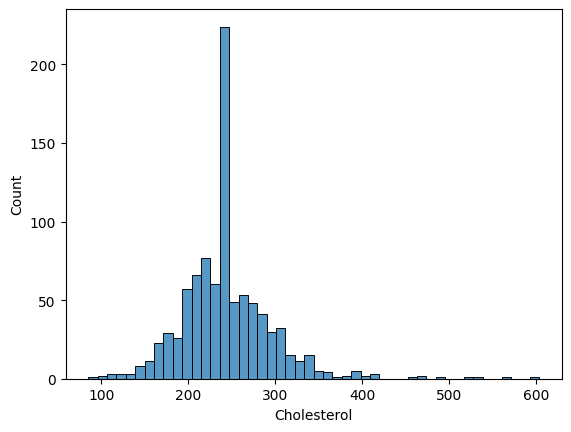

In [ ]:
# Vamos perceber que tem um pico elevado para colesterol na faixa de 244.0, devido as mudanças feitas anteriormente

import seaborn as sns
sns.histplot(dados_temp, x='Cholesterol')
# sns.histplot(dados, x='Cholesterol') # veja o gráfico com os dados iniciais que possui valores zero para colesterol

### Lidando com Outliers

In [ ]:
# Idade (não foi alterada. Não temos outliers)
import plotly.express as px
px.box(dados_temp, y='Age')

In [ ]:
# Pressão Sanguínea em Repouso
# Esses dados (outliers) não necessariamente precisam ser removidos. Pode indicar problema cardíaco.
import plotly.express as px
px.box(dados_temp, y='RestingBP')

In [ ]:
# Colesterol
# Esses dados (outliers) não necessariamente precisam ser removidos. Pode indicar problema cardíaco.
import plotly.express as px
px.box(dados_temp, y='Cholesterol')
# px.box(dados, y='Cholesterol')

In [ ]:
# Máxima Frequência Cardíaca
# Esses dados (outliers) não necessariamente precisam ser removidos. Pode indicar problema cardíaco.
import plotly.express as px
px.box(dados_temp, y='MaxHR')

In [ ]:
dados_temp.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.789531,2.943293,132.540894,244.703381,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795,0.552890
std,9.437636,0.407864,1.230548,17.999749,53.347314,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,245.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


### Exportação

Com os dados tratados, podemos exportar

In [ ]:
dados_temp.to_csv('dados_temp.csv', sep=',', index=False, encoding='utf-8')

## Etapa 02

Vamos continuar o pré-processamento dos dados. Vou carregar o dataset exportado anteriormente, sem usar OneHotEncoding

In [ ]:
import numpy as np
import pandas as pd

# df = pd.read_csv('dados_tratados.csv', sep=',')
df = pd.read_csv('https://gist.githubusercontent.com/fabricioifc/227d10871d4b5b62ddbadfa1911fcd3e/raw/755d436ef19a54d51137f5495df360d0fa3838b1/dados_tratados.csv', sep=',')

In [ ]:
df.shape

(917, 12)

In [ ]:
df.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,float64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


In [ ]:
# Temos 11 atributos previsores e 1 atributo supervisor (HeartDisease)
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,0,172,0,0.0,0,0
1,49,0,2,160,180.0,0,0,156,0,1.0,1,1
2,37,1,1,130,283.0,0,1,98,0,0.0,0,0
3,48,0,4,138,214.0,0,0,108,1,1.5,1,1
4,54,1,2,150,195.0,0,0,122,0,0.0,0,0


### Separação do Conjunto de Dados

Vamos dividir o conjunto de dados para classificação entre:
 - Previsores: todos os atributos, exceto HeartDisease
 - Supervisor: HeartDisease (0 ou 1)

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,0,172,0,0.0,0,0
1,49,0,2,160,180.0,0,0,156,0,1.0,1,1
2,37,1,1,130,283.0,0,1,98,0,0.0,0,0
3,48,0,4,138,214.0,0,0,108,1,1.5,1,1
4,54,1,2,150,195.0,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,1,3,110,264.0,0,0,132,0,1.2,1,1
913,68,1,4,144,193.0,1,0,141,0,3.4,1,1
914,57,1,4,130,131.0,0,0,115,1,1.2,1,1
915,57,0,1,130,236.0,0,2,174,0,0.0,1,1


In [ ]:
# iloc[:  -> Pega todas as linhas
# :11]    -> Pega as 11 primeiras colunas

previsores = df.iloc[:, 0:11]  # Pegando as primeiras 11 colunas
supervisor = df.loc[:, 'HeartDisease']   # Pegando a coluna HeartDisease (variável alvo)

# Exibindo as dimensões dos conjuntos
print(f"Shape dos previsores: {previsores.shape}")
print('-' * 50)
print(f"Shape do supervisor: {supervisor.shape}")
print('-' * 50)

# Exibindo uma amostra dos dados para melhor visualização
print("Pré-visualização dos previsores:")
print(previsores.values)
print('-' * 50)

print("Pré-visualização do supervisor:")
print(supervisor.values)


Shape dos previsores: (917, 11)
--------------------------------------------------
Shape do supervisor: (917,)
--------------------------------------------------
Pré-visualização dos previsores:
[[40.   1.   1.  ...  0.   0.   0. ]
 [49.   0.   2.  ...  0.   1.   1. ]
 [37.   1.   1.  ...  0.   0.   0. ]
 ...
 [57.   1.   4.  ...  1.   1.2  1. ]
 [57.   0.   1.  ...  0.   0.   1. ]
 [38.   1.   2.  ...  0.   0.   0. ]]
--------------------------------------------------
Pré-visualização do supervisor:
[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0

### Analisando o Escalonamento dos Atributos

Para lidar com a escala dos valores dos atributos (também chamado de normalização ou padronização). Modelos como Regressão Linear, KNN, SVM, Redes Neurais são sensíveis à escala dos dados.

Podemos lidar com isso usando:

* **Padronização**: utiliza média e desvio padrão como base (usaremos esse). Os valores de média vão ficar próximos de zero e o desvio padrão próximo de 1.
* **Normalização**: utiliza valores máximo e mínimo como base

**Observação**: não é necessário escalonar a variável alvo (HeartDisease) se ela for categórica/binária (0 ou 1).

In [ ]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.789531,2.943293,132.540894,244.703381,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795,0.552890
std,9.437636,0.407864,1.230548,17.999749,53.347314,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,245.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


In [ ]:
# Demonstrando como é feito o cálculo

# Calcula a média da coluna 'Age' (Idade) do DataFrame
media_idade = df['Age'].mean()

# Calcula o desvio padrão da coluna 'Age' (Idade)
desvio_padrao_idade = df['Age'].std()

# Exibe a média e o desvio padrão da idade
print(f"Média da idade: {media_idade}")
print(f"Desvio padrão da idade: {desvio_padrao_idade}")

# Seleciona a primeira idade do DataFrame
amostra = df.Age[0]

# Exibe a idade da primeira amostra
amostra

# Padroniza a idade usando a fórmula: (X - média) / desvio padrão
nova_idade = (amostra - media_idade) / desvio_padrao_idade

# Exibe a idade padronizada
nova_idade


Média da idade: 53.5092693565976
Desvio padrão da idade: 9.437635519745857


np.float64(-1.4314252047912723)

In [ ]:
# Padronizando os atributos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
previsores_escalonados = scaler.fit_transform(previsores)
previsores_escalonados = pd.DataFrame(previsores_escalonados, columns=previsores.columns) # Transformando em dataframe
previsores_escalonados

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.432206,0.516309,-1.580072,0.414627,0.830797,-0.551733,-0.749818,1.383339,-0.824310,-0.831502,-1.051095
1,-0.478057,-1.936826,-0.766982,1.526360,-1.213532,-0.551733,-0.749818,0.754736,-0.824310,0.106251,0.596519
2,-1.750256,0.516309,-1.580072,-0.141240,0.718265,-0.551733,0.491306,-1.523953,-0.824310,-0.831502,-1.051095
3,-0.584074,-1.936826,0.859197,0.303453,-0.575852,-0.551733,-0.749818,-1.131075,1.213136,0.575128,0.596519
4,0.052026,0.516309,-0.766982,0.970493,-0.932203,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502,-1.051095
...,...,...,...,...,...,...,...,...,...,...,...
912,-0.902124,0.516309,0.046108,-1.252973,0.361914,-0.551733,-0.749818,-0.188170,-0.824310,0.293802,0.596519
913,1.536257,0.516309,0.859197,0.636973,-0.969713,1.812470,-0.749818,0.165420,-0.824310,2.356860,0.596519
914,0.370075,0.516309,0.859197,-0.141240,-2.132543,-0.551733,-0.749818,-0.856061,1.213136,0.293802,0.596519
915,0.370075,-1.936826,-1.580072,-0.141240,-0.163235,-0.551733,1.732430,1.461915,-0.824310,-0.831502,0.596519


In [ ]:
# Perceba que os valores ficaram mais próximos. Isso é util porque se um atributo tem valores entre 0 e 1 e outro entre 0 e 10.000, o segundo terá mais influência apenas por sua magnitude.
previsores_escalonados.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.859654e-16,-7.748558e-17,1.355998e-16,7.767929e-16,6.392560e-17,4.649135e-17,0.000000,-5.114048e-16,-1.046055e-16,7.748558e-17,-3.874279e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.704405e+00,-1.936826e+00,-1.580072e+00,-2.920572e+00,-2.995287e+00,-5.517333e-01,-0.749818,-3.016886e+00,-8.243101e-01,-3.269662e+00,-1.051095e+00
25%,-6.900904e-01,5.163086e-01,-7.669820e-01,-6.971063e-01,-5.758516e-01,-5.517333e-01,-0.749818,-6.596226e-01,-8.243101e-01,-8.315022e-01,-1.051095e+00
50%,5.202558e-02,5.163086e-01,8.591972e-01,-1.412398e-01,5.563191e-03,-5.517333e-01,-0.749818,4.755658e-02,-8.243101e-01,-2.688500e-01,5.965186e-01
75%,6.881250e-01,5.163086e-01,8.591972e-01,4.146267e-01,4.181801e-01,-5.517333e-01,0.491306,7.547357e-01,1.213136e+00,5.751284e-01,5.965186e-01
max,2.490407e+00,5.163086e-01,8.591972e-01,3.749826e+00,6.719966e+00,1.812470e+00,1.732430,2.561971e+00,1.213136e+00,4.982571e+00,2.244132e+00


### Codificação de Variáveis Categóricas

Já fizemos isso manualmente (Veja em Transformando as variáveis categóricas nominais em variáveis categóricas ordinais)

Agora, vamos ver como fazer isso automaticamente.

In [ ]:
!curl -L -o dados_tratados.csv https://gist.githubusercontent.com/fabricioifc/227d10871d4b5b62ddbadfa1911fcd3e/raw/755d436ef19a54d51137f5495df360d0fa3838b1/dados_tratados.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32139  100 32139    0     0  48503      0 --:--:-- --:--:-- --:--:-- 48475


In [ ]:
data = pd.read_csv('dados_tratados.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,0,172,0,0.0,0,0
1,49,0,2,160,180.0,0,0,156,0,1.0,1,1
2,37,1,1,130,283.0,0,1,98,0,0.0,0,0
3,48,0,4,138,214.0,0,0,108,1,1.5,1,1
4,54,1,2,150,195.0,0,0,122,0,0.0,0,0


In [ ]:
previsores2 = data.iloc[:, 0:11].values
previsores2

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  1. ,  4. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  0. ]])

In [ ]:
# Usaremos a biblioteca LabelEncoder do scikit learn. Vamos aplicar a nosso dataset original apenas para demonstração
from sklearn.preprocessing import LabelEncoder
previsores2[:, 1] = LabelEncoder().fit_transform(previsores2[:,1])
previsores2[:, 2] = LabelEncoder().fit_transform(previsores2[:,2])
previsores2[:, 6] = LabelEncoder().fit_transform(previsores2[:,6])
previsores2[:, 8] = LabelEncoder().fit_transform(previsores2[:,8])
previsores2[:, 10] = LabelEncoder().fit_transform(previsores2[:,10])

In [ ]:
previsores2

array([[40. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [49. ,  0. ,  1. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  1. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  1. , ...,  0. ,  0. ,  0. ]])

### OneHotEncoder: Variaveis Dummy (fictícias)

#### Por que usar One-Hot Encoding?
Quando temos uma variável categórica com várias opções, como "Posição" no futebol, simplesmente atribuir um número para cada categoria (ex.: 1 para "Atacante", 2 para "Goleiro", 3 para "Meio-Campo") pode gerar um problema de ordem implícita. Isso ocorre porque o modelo pode interpretar que 2 (Goleiro) é mais importante que 1 (Atacante), ou que 3 (Meio-Campo) é maior que 2. Esse tipo de ordem arbitrária pode induzir o modelo a fazer interpretações erradas, já que as categorias não possuem uma ordem natural.

### Exemplo com Dataset sobre Futebol

**Dataset Original:**
```
   Jogador      Posição
0  Ronaldo      Atacante
1  Dida         Goleiro
2  Vampeta      Meio-Campo
3  Vini         Atacante
```

**Dataset com Posições Codificadas (One-Hot):**
```
   Jogador      Atacante  Goleiro  Meio-Campo
0  Ronaldo        1.0      0.0         0.0
1  Dida           0.0      1.0         0.0
2  Vampeta        0.0      0.0         1.0
3  Vini           1.0      0.0         0.0
```

- A coluna **"Posição"** foi transformada em 3 colunas: **"Atacante"**, **"Goleiro"** e **"Meio-Campo"**.
- **Cada jogador tem um valor `1` na coluna correspondente à sua posição**, e `0` nas outras colunas.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Vamos ver quais parâmetros precisamos passar para a função (descomente a linha abaixo)
# ColumnTransformer?

In [ ]:
previsores2

array([[40. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [49. ,  0. ,  1. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  1. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  1. , ...,  0. ,  0. ,  0. ]])

In [ ]:
# Vamos transformar as colunas: Sex, ChestPainType, RestingECG, ExerciseAngina,

# transformer: Tipo OneHot
# passtrough: mantem as outras colunas
previsores_one_hot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 2, 6, 8, 10])], remainder='passthrough')
previsores_one_hot = previsores_one_hot.fit_transform(previsores2)

In [ ]:
# Agora teremos 20 atributos e perdemos o nome das colunas
previsores_one_hot.shape

(917, 20)

In [ ]:


import pandas as pd
previsores_one_hot_df = pd.DataFrame(previsores_one_hot)
previsores_one_hot_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,40.0,140.0,289.0,0.0,172.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,37.0,130.0,283.0,0.0,98.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,54.0,150.0,195.0,0.0,122.0,0.0


### Escalonamento

Vamos escalonar os demais atributos

In [ ]:
from sklearn.preprocessing import StandardScaler

previsores_final = StandardScaler().fit_transform(previsores_one_hot)
previsores_final

array([[-0.51630861,  0.51630861,  2.07378351, ..., -0.55173333,
         1.38333943, -0.83150225],
       [ 1.9368261 , -1.9368261 , -0.48221041, ..., -0.55173333,
         0.75473573,  0.10625149],
       [-0.51630861,  0.51630861,  2.07378351, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [-0.51630861,  0.51630861, -0.48221041, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [ 1.9368261 , -1.9368261 ,  2.07378351, ..., -0.55173333,
         1.46191489, -0.83150225],
       [-0.51630861,  0.51630861, -0.48221041, ..., -0.55173333,
         1.42262716, -0.83150225]])

In [ ]:
# A ideia é que a média fique próximo de 0 e std próximo de 1
import pandas as pd
previsores_final_df = pd.DataFrame(previsores_final)
previsores_final_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.084798e-16,-1.472226e-16,-3.874279e-17,3.874279e-17,6.973702e-17,1.937139e-17,-9.298269e-17,1.549712e-17,0.000000,-4.261707e-17,4.261707e-17,-3.874279e-17,0.000000,8.523413e-17,1.859654e-16,7.884157e-16,6.489417e-17,-1.549712e-17,-5.114048e-16,-1.859654e-16
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-5.163086e-01,-1.936826e+00,-4.822104e-01,-5.315237e-01,-2.298105e-01,-1.085425e+00,-1.226974e+00,-4.907810e-01,-0.507826,-1.213136e+00,-8.243101e-01,-8.698879e-01,-1.001091,-2.716072e-01,-2.704405e+00,-2.920572e+00,-2.995287e+00,-5.517333e-01,-3.016886e+00,-3.269662e+00
25%,-5.163086e-01,5.163086e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,-1.085425e+00,-1.226974e+00,-4.907810e-01,-0.507826,-1.213136e+00,-8.243101e-01,-8.698879e-01,-1.001091,-2.716072e-01,-6.900904e-01,-6.971063e-01,-5.758516e-01,-5.517333e-01,-6.596226e-01,-8.315022e-01
50%,-5.163086e-01,5.163086e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,9.212982e-01,8.150134e-01,-4.907810e-01,-0.507826,8.243101e-01,-8.243101e-01,-8.698879e-01,0.998910,-2.716072e-01,5.202558e-02,-1.412398e-01,5.563191e-03,-5.517333e-01,4.755658e-02,-2.688500e-01
75%,-5.163086e-01,5.163086e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,9.212982e-01,8.150134e-01,-4.907810e-01,-0.507826,8.243101e-01,1.213136e+00,1.149573e+00,0.998910,-2.716072e-01,6.881250e-01,4.146267e-01,4.181801e-01,-5.517333e-01,7.547357e-01,5.751284e-01
max,1.936826e+00,5.163086e-01,2.073784e+00,1.881384e+00,4.351412e+00,9.212982e-01,8.150134e-01,2.037569e+00,1.969177,8.243101e-01,1.213136e+00,1.149573e+00,0.998910,3.681787e+00,2.490407e+00,3.749826e+00,6.719966e+00,1.812470e+00,2.561971e+00,4.982571e+00


### Resumindo

 - **supervisor**: variável que contém apenas 1 coluna/dimensão. Será 0 ou 1 para identificar doênça cardíaca (classificação)
 - **previsores**: conjunto de variáveis categóricas transformadas em numéricas, sem escalonar
 - **previsores_escalonado**: variável previsores escalonada. Usamos StandardScaler()
 - **previsores_one_hot**: aplicamos LabelEncoder e OneHotEncoder nas colunas Sex, ChestPainTyppe, RestingECG, ExerciceAngina, ST_Slope. Sem escalonar
 - **previsores_final**: aplicamos também escalonamento à varivavel previsores_one_hot.


# Etapa 3

### Redução de Dimensionalidade

Usado para diminuir o número de atributos (ou features) no conjunto de dados para treinamento do algoritmo, mantendo o máximo de informação relevante possível. Isso é feito através da análise das correlações entre os atributos.

Não usaremos neste projeto, mas pode ser útil em outros trabalhos.

#### Técnica: Análise dos Componentes Principais (PCA)

PCA é um algoritmo de aprendizado não supervisionado, pois ele não utiliza rótulos (labels) para realizar a transformação dos dados. É uma das técnicas mais utilizadas.

1. Seleção de Características: mantém atributos originais, apenas removendo os menos importantes.
2. Extração de Características: Encontra os relacionamentos dos melhores atributos e cria novos atributos.

Vamos usar a segunda opção neste exemplo:

In [ ]:
# # # Baixar o dataset com os dados tratados anteriormente
# !curl -L -o heart_tratados.csv https://gist.githubusercontent.com/fabricioifc/227d10871d4b5b62ddbadfa1911fcd3e/raw/755d436ef19a54d51137f5495df360d0fa3838b1/dados_tratados.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32139  100 32139    0     0  63269      0 --:--:-- --:--:-- --:--:-- 63390


In [ ]:
from sklearn.decomposition import PCA

# de 11 vamos rezudir para 4
pca = PCA(n_components=4, svd_solver='auto') # svd_solver : {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'
previsores_pca = pca.fit_transform(previsores)

In [ ]:
previsores_pca.shape

(917, 4)

In [ ]:
previsores_pca

array([[  43.92275409,   36.19878018,   10.65123822,   -9.49639537],
       [ -64.07009231,   13.91065483,   31.68014305,   -5.32328111],
       [  38.48563881,  -33.86298843,  -12.47535169,  -21.54552995],
       ...,
       [-113.40371876,  -23.54946018,   -2.52175619,    1.15157921],
       [  -9.20114308,   35.91971507,    4.82632529,    9.13535585],
       [ -70.09954302,   35.65385957,   12.096028  ,  -10.5306923 ]])

In [ ]:
# Razão das variáveis (essas são as 4 melhores)
# Isso significa que, mesmo reduzindo de 11 para 4 dimensões, a maior parte da informação ainda é preservada, o que pode tornar o modelo mais eficiente.
pca.explained_variance_ratio_

array([0.72832732, 0.1718144 , 0.08120808, 0.01767691])

In [ ]:
# Soma das variáveis explicativas. Vai explicar 99% com estas colunas
pca.explained_variance_ratio_.sum()

np.float64(0.9990266992983816)

### Resumo do Resultado do PCA

 - Antes do PCA: 11 atributos/colunas originais.
 - Após o PCA: 4 componentes principais, mas a informação das 11 colunas foi preservada, apenas comprimida em 4 novas dimensões (colunas).